In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !rm -rf saved_lifter_2d_3d_model/synthetic_cabin_bw/A_Pillar_Codriver/prediction/linear_model/lightning_logs

In [3]:
import pandas as pd
import numpy as np
import torch
import lightning.pytorch as pl
import matplotlib.pyplot as plt
# import plotly
import plotly.express as px

In [4]:
import os
import torch
import pandas as pd
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from modules.lifter_2d_3d.model.linear_model.network.linear_model import BaselineModel
from modules.lifter_2d_3d.dataset.drive_and_act_keypoint_dataset import DriveAndActKeypointDataset
from modules.lifter_2d_3d.model.repnet.lit_repnet import LitRepNet
from modules.utils.visualization import generate_connection_line, get_sample_from_loader, visualize_pose
from IPython.display import display
from experiments.experiment_config import (
    DRIVE_AND_ACT_VIEWPOINTS,
    get_drive_and_act_loaders,
)
pl.seed_everything(1234)

view_point = DRIVE_AND_ACT_VIEWPOINTS[1]
constructed_loader = get_drive_and_act_loaders(view_point, subset_percentage=100)
train_loader = constructed_loader['train_loader']
val_loader = constructed_loader['val_loader']
test_loader = constructed_loader['test_loader']
all_activities = constructed_loader['all_activities']
print(
    'train_dataset', len(train_loader.dataset),
    'val_dataset', len(val_loader.dataset),
    'test_dataset', len(test_loader.dataset)
)
model_checkpoint = ModelCheckpoint(monitor='mpjpe',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='mpjpe', mode="min", patience=5)

# ------------
# model
# ------------
lifter_2D_3D = BaselineModel(exclude_ankle=True, exclude_knee=True)
lit_model = LitRepNet(lifter_2D_3D=lifter_2D_3D, all_activities=all_activities)
# ------------
# training
# ------------
# saved_model_path = './saved_lifter_2d_3d_model/synthetic_cabin_bw/A_Pillar_Codriver/prediction/repnet_linear_model/'
saved_model_path = f'./saved_lifter_2d_3d_model/rq3/repnet/drive_and_act/{view_point}'
if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device', device)
# device = 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=100,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=5,
    default_root_dir=saved_model_path,
    reload_dataloaders_every_n_epochs=1,
    # gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 22505 val_dataset 6158 test_dataset 10959
device cuda


Missing logger folder: saved_lifter_2d_3d_model/rq3/repnet/drive_and_act/a_column_driver/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type               | Params
-----------------------------------------------------
0 | lifter_2D_3D  | BaselineModel      | 4.3 M 
1 | camera_net    | CameraNet          | 4.0 M 
2 | generator     | RepNet             | 8.3 M 
3 | discriminator | DiscriminatorModel | 89.2 K
-----------------------------------------------------
8.4 M     Trainable params
0         Non-trainable params
8.4 M     Total params
33.650    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2071.0859298706055
val P-MPJPE from: 128 samples : 1863.5739270823262
activity_macro_mpjpe 2074.2502212524414
activity_macro_procrusted_mpjpe 1858.9280330542279


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 1755 batches:
d_loss = 4.446856528197938
g_loss = -0.32088604903119244
c_loss = 1.6972361375124028
pose_2d_loss = 50.97487488662416
total_g_loss = 52.35122496395709
val MPJPE from: 6158 samples : 640.0363445281982
val P-MPJPE from: 6158 samples : 536.4979775302562
activity_macro_mpjpe 648.7715244293213
activity_macro_procrusted_mpjpe 536.2262450763506


Validation: 0it [00:00, ?it/s]

check #2
training loss from 1755 batches:
d_loss = 2.419915997846174
g_loss = -0.2760715817411741
c_loss = 1.6939380446730177
pose_2d_loss = 5.618423581530905
total_g_loss = 7.036290042284887
val MPJPE from: 6158 samples : 666.0746335983276
val P-MPJPE from: 6158 samples : 518.7247316850888
activity_macro_mpjpe 673.5175848007202
activity_macro_procrusted_mpjpe 513.9647298461174


Validation: 0it [00:00, ?it/s]

check #3
training loss from 1755 batches:
d_loss = 1.6923919875907083
g_loss = -0.3810825433826175
c_loss = 1.679742778875889
pose_2d_loss = 1.1239030217003618
total_g_loss = 2.4225632598936726
val MPJPE from: 6158 samples : 394.29622888565063
val P-MPJPE from: 6158 samples : 320.620316930986
activity_macro_mpjpe 402.23991870880127
activity_macro_procrusted_mpjpe 322.90132528693005


Validation: 0it [00:00, ?it/s]

check #4
training loss from 1755 batches:
d_loss = 14.99398143940162
g_loss = -0.41088699691903585
c_loss = 0.6439134756129692
pose_2d_loss = 0.428778202657686
total_g_loss = 0.661804681405043
val MPJPE from: 6158 samples : 349.0772843360901
val P-MPJPE from: 6158 samples : 197.43572324363655
activity_macro_mpjpe 354.6680212020874
activity_macro_procrusted_mpjpe 199.09775727826585


Validation: 0it [00:00, ?it/s]

check #5
training loss from 1755 batches:
d_loss = 6.828615414926469
g_loss = -0.9201242426012316
c_loss = 0.12815813278498134
pose_2d_loss = 0.194680295685078
total_g_loss = -0.5972858140356521
val MPJPE from: 6158 samples : 955.02769947052
val P-MPJPE from: 6158 samples : 878.0566827503229
activity_macro_mpjpe 954.4685482978821
activity_macro_procrusted_mpjpe 882.0752858008258


Validation: 0it [00:00, ?it/s]

check #6
training loss from 1755 batches:
d_loss = 3.556035816024172
g_loss = -0.5365640397785906
c_loss = 0.14161691090723558
pose_2d_loss = 0.18604412207491378
total_g_loss = -0.20890300680599322
val MPJPE from: 6158 samples : 511.4400386810303
val P-MPJPE from: 6158 samples : 449.83134608610777
activity_macro_mpjpe 525.6544947624207
activity_macro_procrusted_mpjpe 450.46373830780067
current learning rate: [9.5e-05] [9.5e-05]
current learning rate: [9.025e-05] [9.025e-05]
current learning rate: [8.573749999999999e-05] [8.573749999999999e-05]


Validation: 0it [00:00, ?it/s]

check #7
training loss from 1755 batches:
d_loss = 3.5479807777622145
g_loss = -0.8650892854076505
c_loss = 0.11040704022785197
pose_2d_loss = 0.15541889935445327
total_g_loss = -0.5992633451508661
val MPJPE from: 6158 samples : 694.4871544837952
val P-MPJPE from: 6158 samples : 594.514013814381
activity_macro_mpjpe 698.276162147522
activity_macro_procrusted_mpjpe 598.2488519420658
current learning rate: [8.145062499999998e-05] [8.145062499999998e-05]
current learning rate: [7.737809374999998e-05] [7.737809374999998e-05]
current learning rate: [7.350918906249998e-05] [7.350918906249998e-05]
current learning rate: [6.983372960937497e-05] [6.983372960937497e-05]
current learning rate: [6.634204312890622e-05] [6.634204312890622e-05]


Validation: 0it [00:00, ?it/s]

check #8
training loss from 1755 batches:
d_loss = 2.903556077789377
g_loss = -0.7031089092421735
c_loss = 0.09148781332704756
pose_2d_loss = 0.1590588315504144
total_g_loss = -0.4525622648476196
val MPJPE from: 6158 samples : 476.4612019062042
val P-MPJPE from: 6158 samples : 398.26298268088823
activity_macro_mpjpe 484.74910855293274
activity_macro_procrusted_mpjpe 396.0732150856295
current learning rate: [6.30249409724609e-05] [6.30249409724609e-05]
current learning rate: [5.987369392383786e-05] [5.987369392383786e-05]
current learning rate: [5.688000922764596e-05] [5.688000922764596e-05]
current learning rate: [5.4036008766263664e-05] [5.4036008766263664e-05]
current learning rate: [5.133420832795048e-05] [5.133420832795048e-05]


Validation: 0it [00:00, ?it/s]

check #9
training loss from 1755 batches:
d_loss = 2.837807900188995
g_loss = -0.9559051815770631
c_loss = 0.047790321104355854
pose_2d_loss = 0.18159679394119826
total_g_loss = -0.7265180666222532
val MPJPE from: 6158 samples : 2004.312515258789
val P-MPJPE from: 6158 samples : 1818.8978902301417
activity_macro_mpjpe 2005.4631233215332
activity_macro_procrusted_mpjpe 1804.0493658038313
current learning rate: [4.876749791155295e-05] [4.876749791155295e-05]


In [5]:
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/rq3/repnet/drive_and_act/a_column_driver/lightning_logs/version_0/checkpoints/epoch=19-step=14040.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/rq3/repnet/drive_and_act/a_column_driver/lightning_logs/version_0/checkpoints/epoch=19-step=14040.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   activity_macro_mpjpe    │     340.0362730026245     │
│           mpjpe           │    337.23098039627075     │
│  p_activity_macro_mpjpe   │    205.88524855952733     │
│          p_mpjpe          │    204.25219815217392     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 337.23098039627075,
  'p_mpjpe': 204.25219815217392,
  'activity_macro_mpjpe': 340.0362730026245,
  'p_activity_macro_mpjpe': 205.88524855952733}]

In [6]:
img = plt.imread(f'/root/data/processed/drive_and_act/inner_mirror/images/train/{item["filenames"]}')
fig, ax = plt.subplots()
ax.imshow(img)

ax.scatter(item['pose_2d'][:,0] * item['scale_factor'][0] + item['root_2d'][0], item['pose_2d'][:,1] * item['scale_factor'][1] + item['root_2d'][1])

NameError: name 'item' is not defined

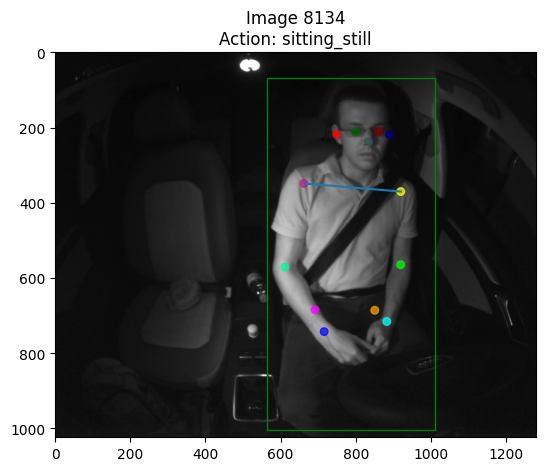

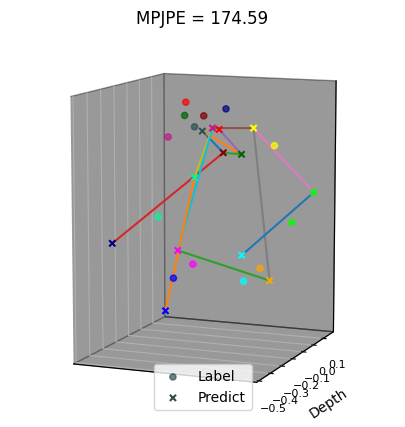

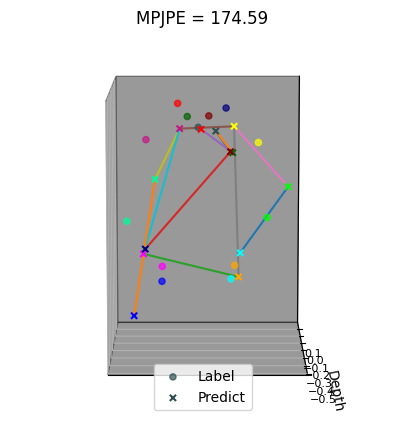

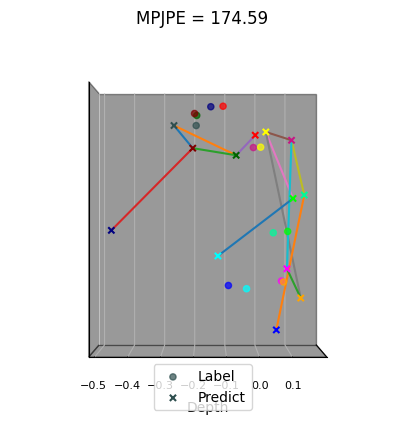

In [ ]:
from pathlib import Path
view_point = 'inner_mirror'
from modules.utils.visualization import (
    plot_samples
)

plot_samples(
    Path(f'/root/data/processed/drive_and_act/') / view_point,
    lit_model,
    test_loader,
    'train',
    img_figsize=(20/2, 10/2),
    plot_figsize=(20.5/2, 10/2),
    sample_indices=[500],
    # sample_indices=[500],
    is_plot_gt_skeleton=False
)